<a href="https://colab.research.google.com/github/Stackset1/MAT102/blob/main/notebooks/oblig1/innlevering1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Første obligatoriske innlevering i MAT 102, Vår 2025

I denne oppgaven skal du fylle inn kode i denne notebook. Les oppgaveteksten grundig. Når du er ferdig går du opp i menyen og velger "kjør alt" og eksporterer notebooken med alt kjørt i rekkefølge fra top til bunn som en ipynb fil. Denne filen laster du opp på mitt uib. Hvis du foretrekker å bruke Spyder eller VSCode er det helt i orden. Da må du kopiere kodeblokkene, kjøre dem der og laste både kode og bilder av plottene du produserer opp på mitt uib.

In [2]:
import numpy as np
import unicodedata
from IPython.display import Markdown as md
import matplotlib.pyplot as plt

## Generering av oppgave

Denne oppgaven blir generert ut i fra navnet ditt. Fyll inn det fulle navnet ditt i stedet for der det står "Mitt Navn" i feltet under og velg "kjør alt" ("run all") i collab menyen for å genere din personlige versjon oppgaven.

In [3]:
navn = "Thomas Claussen Stakset"

In [4]:
bytenavn = unicodedata.normalize("NFKD", navn).encode("ascii", "ignore")
seed = int.from_bytes(bytenavn)

## Oppgave 1

Kodesnutten herunder definerer en funksjon $w(x)$ som skal undersøkes i denne oppgaven.

In [5]:
def w(x):
    res = 0
    for i in range(3):
        res = res + np.cos((7**i)*np.pi*x)/(2**i)
    return res

#### I cellen under genereres din personlige versjon av denne oppgaven.
Koden under genererer din personlige variant av denne oppgaven. Løs den genererte oppgaven som vises under den. Koden kan du ignorere.

In [6]:
rng = np.random.default_rng(seed)
md(
f'''
1. Plot funksjonen w(x) på intervallet $[{-((int(100 * rng.random()) % 4) -1)/10}, {(1 + int(100 * rng.random()) % 4)/10}]ienliste‘x‘avpunkter.Plottetskalhaenpassendetittel,vanligaksekorsogpassendexlabelogylabel.Varierantalletavpunkterilisten‘x‘ogvelgetantallderalledetaljertilgrafentilfunksjoenw(x)$ vises.
1. Plot den numerisk beregnede deriverte funksjonen til w(x). Gjør plottet fint som i spørsmålet over. Hva kan du si om funksjonen w(x) utifra hva du ser?
1. Lag en python funksjon `wderivert(x)` som beregner den eksakte deriverte til funksjonen w(x). Plot den eksakte deriverte og den numeriske derivete fra forrige delspørsmål i samme koordinatsystem. Lag både et plot med så få verdier i listen `x` at de to grafene er forskjellige og et plot der de to grafene er nesten like.
''')



1. Plot funksjonen w(x) på intervallet $[-0.1, 0.2]ienliste‘x‘avpunkter.Plottetskalhaenpassendetittel,vanligaksekorsogpassendexlabelogylabel.Varierantalletavpunkterilisten‘x‘ogvelgetantallderalledetaljertilgrafentilfunksjoenw(x)$ vises.
1. Plot den numerisk beregnede deriverte funksjonen til w(x). Gjør plottet fint som i spørsmålet over. Hva kan du si om funksjonen w(x) utifra hva du ser?
1. Lag en python funksjon `wderivert(x)` som beregner den eksakte deriverte til funksjonen w(x). Plot den eksakte deriverte og den numeriske derivete fra forrige delspørsmål i samme koordinatsystem. Lag både et plot med så få verdier i listen `x` at de to grafene er forskjellige og et plot der de to grafene er nesten like.


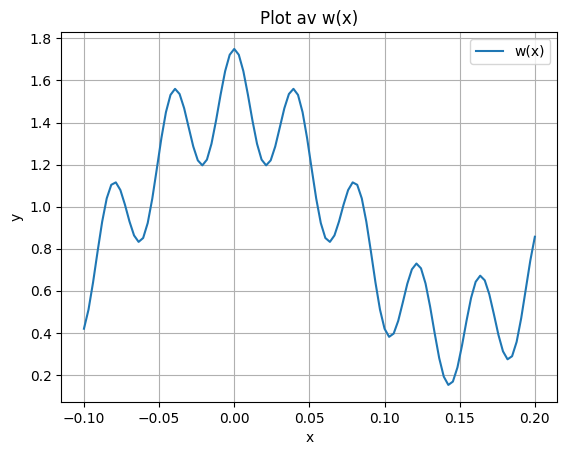

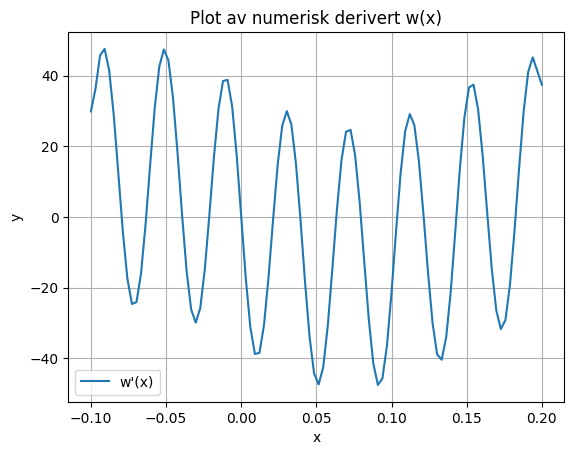

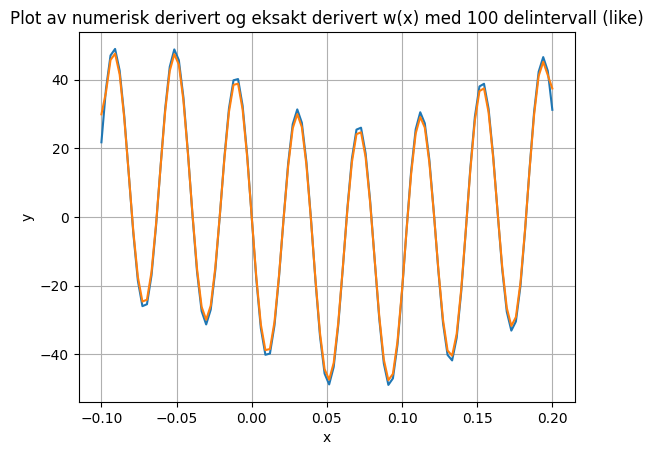

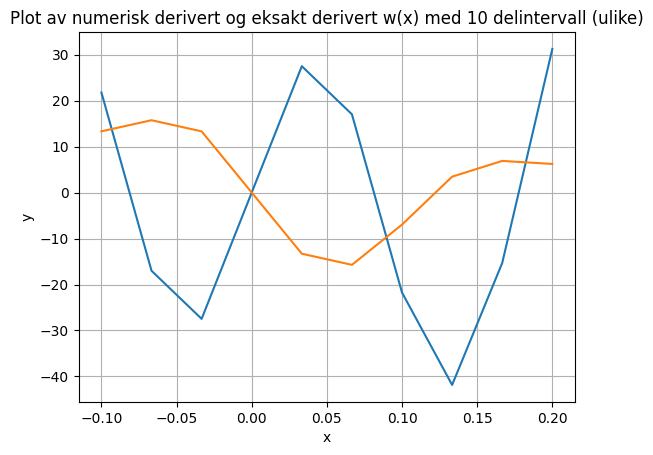

In [29]:
# Oppgave 1

x = np.linspace(-0.1, 0.2, 100)
y = w(x)

plt.plot(x, y, label="w(x)")
plt.title("Plot av w(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

# Oppgave 2

x_oppgave2 = np.linspace(-0.1, 0.2, 100)
y_oppgave2 = np.gradient(y, x_oppgave2)

plt.plot(x_oppgave2, y_oppgave2, label="w'(x)")
plt.title("Plot av numerisk derivert w(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

# Oppgave 3

def wderivert(x):
    res = 0
    for i in range(3):
        res = res + -np.sin((7**i) * np.pi * x) * (7**i) * np.pi / (2**i)
    return res

x = np.linspace(-0.1, 0.2, 100)
y = wderivert(x)

plt.plot(x, y)
plt.plot(x_oppgave2, y_oppgave2)
plt.title("Plot av numerisk derivert og eksakt derivert w(x) med 100 delintervall (like)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()



x_oppgave3 = np.linspace(-0.1, 0.2, 10)
y_oppgave3 = np.gradient(w(x_oppgave3), x_oppgave3)

y = wderivert(x_oppgave3)

plt.plot(x_oppgave3, y)
plt.plot(x_oppgave3, y_oppgave3)
plt.title("Plot av numerisk derivert og eksakt derivert w(x) med 10 delintervall (ulike)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()






## Oppgave 2

I denne oppgaven skal vi bruke numerisk integrasjon.
Vi skal bruke Simpsons regel, som tilnærmer en funksjone som en serie av andregradsfunksjoner som går gjennom endepunktene og midtpunktet på delintervaller. På figuren vises Simpsons regel for en sinusfunksjon.

![Simpson](https://github.com/mbr085/V25MAT102/blob/main/notebooks/oblig1/Simpsonsrule2.gif?raw=1)

Du kan lese mer om Simpson regelen (Simpson's rule på engelsk) [her](https://en.wikipedia.org/wiki/Simpson%27s_rule). Den norske Wikipedia-artikkelen har også noen tips til hvordan metoden kan implementeres, og kan leses [her](https://no.wikipedia.org/wiki/Simpson-integrasjon).

#### I cellen under genereres din personlige versjon av denne oppgaven.

In [8]:
rng = np.random.default_rng(seed + 1)
md(
f'''
1. Del intervallet [{-(int(100 * rng.random()) % 2) + 2} , {(int(100 * rng.random()) % 4) + 4}]  i 2 like lange delintervaller. La `y_0` være funksjonsverdien i det venstre endepunktet, la `y_1` være funksjonsverdien i midtpunktet og la `y_2` være funksjonsverdien i det høyre endepunktet av intervallet. Fullfør python funksjonen `simpson_bit` under slik at den bruker Simpsons regel til å regne ut integralet til $f(x) = 130 \sin(3x - \pi/2) + 250$ på det angitte intervallet. Skriv også kommentarer i koden. (Husk at du kan bruke alle verktøy du har til rådighet.)
1. Gjenta punkt 1, men bruk 6, 10, og 100 delintervaller. Du kan bruke koden under hvis du vil. Husk kommentarer i koden der du beskriver hva den gjør. Hva skjer med verdien på integralet? Kan du gjette hva det ekte integralet er?
1. Bruk Simpsons regel på g(x)=x2−2x−16 på det samme intervallet. Hva finner du ut når du prøver forskjellig antall delintervaller? Kan Simpsons formel ta oddetall delintervaller? Kan du forklare dette?''')


1. Del intervallet [1 , 6]  i 2 like lange delintervaller. La `y_0` være funksjonsverdien i det venstre endepunktet, la `y_1` være funksjonsverdien i midtpunktet og la `y_2` være funksjonsverdien i det høyre endepunktet av intervallet. Fullfør python funksjonen `simpson_bit` under slik at den bruker Simpsons regel til å regne ut integralet til $f(x) = 130 \sin(3x - \pi/2) + 250$ på det angitte intervallet. Skriv også kommentarer i koden. (Husk at du kan bruke alle verktøy du har til rådighet.)
1. Gjenta punkt 1, men bruk 6, 10, og 100 delintervaller. Du kan bruke koden under hvis du vil. Husk kommentarer i koden der du beskriver hva den gjør. Hva skjer med verdien på integralet? Kan du gjette hva det ekte integralet er?
1. Bruk Simpsons regel på g(x)=x2−2x−16 på det samme intervallet. Hva finner du ut når du prøver forskjellig antall delintervaller? Kan Simpsons formel ta oddetall delintervaller? Kan du forklare dette?

In [34]:
# Oppgave 1

# Definerer f(x)
def f(x):
  return 130 * np.sin(3*x - (np.pi/2)) + 250

# Definerer intervallet
a = 1
b = 6

# Definerer delintervallet
n = 2

# Regner ut delta x
delta_x = (b-a) / n

y_0 = f(a) # Venstre endepunkt
y_1 = f((a+b)/2) # Midtpunkt
y_2 = f(b) # Høyre endepunkt

# Bruker simpsons regel for å regne ut integralet
print(simpson_bit(y_0, y_1, y_2, delta_x))

# Oppgave 2

# Endret verdien til n lenger opp i oppgaven for å teste
# Verdien på integralet minker jo flere delintervaller man bruker

# Oppgave 3

def g(x):
  return x**2 - 2*x - 16

y_0_g = g(a)
y_1_g = g((a+b)/2)
y_2_g = g(b)


print(simpson_bit(y_0_g, y_1_g, y_2_g, delta_x))




1491.7808792035364
-43.333333333333336


In [11]:
def simpson_bit(y_0, y_1, y_2, delta_x):
    return delta_x/3 * (y_0 + 4 * y_1 + y_2)

In [12]:
def simpson(y, delta_x):
    if len(y) % 2 == 0:
        return 'y må bestå av et odde antall tallverdier'
    res = 0
    for i in range(((len(y) - 1) // 2)):
        y_0 = y[2*i]
        y_1 = y[2*i + 1]
        y_2 = y[2*i + 2]
        res = res + simpson_bit(y_0, y_1, y_2, delta_x)
    return res